In [67]:
import sys
sys.path.insert(0, '../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import imp
imp.reload(model)
import random
from collections import defaultdict
import torch
import math

In [68]:
%matplotlib inline

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


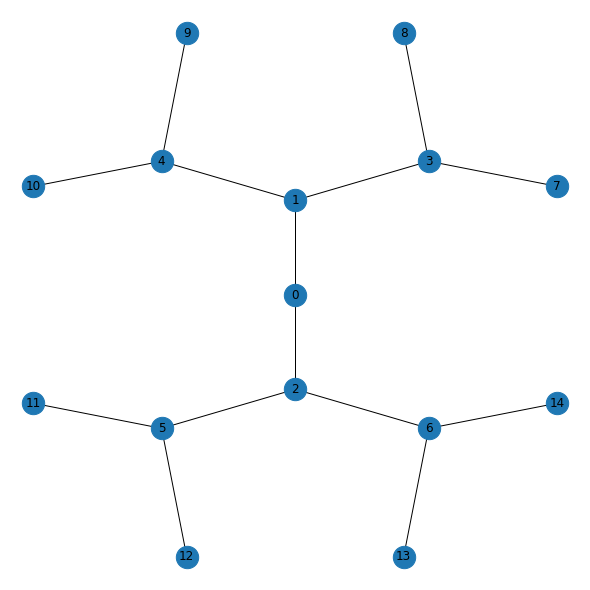

In [234]:
import imp 
imp.reload(graph_gen)
imp.reload(model)
Degree = 3 # degree
Height = 3 # Height of the tree
N, J_interaction = graph_gen.tree_interaction(Degree,Height, rand=False)
j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
h = 0.001
H = np.full((N,), h)
tree = model.model(N, H, J, J_interaction)

In [235]:
import imp 
imp.reload(graph_gen)
imp.reload(model)

tree.exact(1)

beta: 1.0, Fe: -1.194 Energy: -0.758 M: 0.00176 S: 0.43662


-17.90779898524693

# BP

In [236]:
import bp_solver
imp.reload(bp_solver)
BP_tree = bp_solver.BP_solver(tree) 
BP_tree.converge(1)

fe: -1.194, ener: -0.758, M: 0.002, iter 5


# NN

In [237]:
import bp_nn
imp.reload(bp_nn)
net = bp_nn.bp_nn(tree.N, tree, True)
net.train(beta = 1, lr=0.1, batch_size=1000)
net.compute_stat(1,batch_size=100000, )

 1.00 862 fe: -1.194 +- 0.00005 E: -0.764, S: 0.430, M: 0.0066773
free_energy: -1.194,  std_fe: 0.00038, mag_mean: 0.003, entropy: 0.436 energy: -0.758

tensor(-1.1939, dtype=torch.float64)

In [238]:
net.M_i

array([ 0.00532,  0.006  ,  0.00584,  0.00814,  0.00654,  0.00858,
        0.00454, -0.00398, -0.00058, -0.00076, -0.00718,  0.0044 ,
        0.00178,  0.00596,  0.00162], dtype=float32)

# result

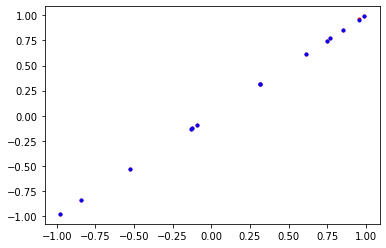

In [241]:
import matplotlib.pyplot as plt
%matplotlib inline
c_ex = []
c_nn = []
c_bp = []
for i, row in enumerate(J_interaction):
    for j, el in enumerate(row):
        if j < i and el != 0:
            c_ex.append(tree.Corr[i][j])
            c_bp.append(BP_tree.Corr[i][j])
            c_nn.append(net.Corr[i][j])
plt.plot(c_ex, c_nn, ".r")
plt.plot(c_ex, c_bp, ".b")